In [ ]:
import pandas as pd
import numpy as np
from statistics import mean

df = pd.read_csv('Resultados2.csv', header=0)
datos = df[df['Difference'] >= 1].dropna()
#display(datos)

#datos = datos.sort_values(by=['Difference'], ascending=False)
back = df.copy()

#display(datos)
diccionario = {}
for item in datos['xgb_prediction']:

    prediccion = item
    row_index = df.index[df['xgb_prediction'] == prediccion].tolist()[0]
    similares=[]
    for j in range (len(df)):
        if df['num_farms_real'][j]<= prediccion + 0.1*prediccion and df['num_farms_real'][j]>= prediccion-0.1*prediccion:
            similares.append(j)
    diccionario[row_index] = similares

similares = diccionario.copy()

df = df[[
    'Hogares censales',
    'Población de 5 años y más que asiste a la escuela',
    'Población derechohabiente a servicios de salud',
    'Población en hogares censales',
    'Población en hogares familiares',
    'Población en hogares no familiares',
    'Población total',
    'Viviendas particulares habitadas que disponen de agua de la red pública en el ámbito de la vivienda',
    'Total de viviendas particulares habitadas',
    'Viviendas particulares habitadas que disponen de computadora',
    'Viviendas particulares habitadas que disponen de drenaje',
    'Viviendas particulares habitadas que disponen de energía eléctrica',
    'Viviendas particulares habitadas que disponen de lavadora',
    'Viviendas particulares habitadas que disponen de excusado o sanitario',
    'UE Unidades económicas',
    'M000A Total de ingresos por suministro de bienes y servicios (millones de pesos)',
    'UE Sector 62 Servicios de salud y de asistencia social',
    'UE Subsector 622 Hospitales',
    'UE Subsector 621 Servicios médicos de consulta externa y servicios relacionados',
    'UE Subsector 623 Residencias de asistencia social y para el cuidado de la salud',
    'Prod_Bruta_Per_Capita',
    '%_Pob_Derechohabiente',
    'Densidad_Poblacional',
    'Economic_Units_Per_Capita',
    'Health_Units_Per_Capita',
    'Porcentaje de población de 60 y más años']]

#display(df)
dists = diccionario.copy()

for key in diccionario:
    distancias = []
    for item in diccionario[key]:
        suma = 0
        for k in range(len(df.loc[item])):
            estandar = 1
            if df.loc[key][k] != 0:
                estandar = df.loc[key][k]
            suma += ((df.loc[key][k]-df.loc[item][k])/estandar)**2
        suma = suma**(1/2)
        distancias.append(suma)
    dists[key]=distancias
    if len(diccionario[key])!=0:
        diccionario[key]=[mean(distancias)]

#print(diccionario)


,Año Censal,Entidad,Municipio,Edad mediana,Grado promedio de escolaridad de la población de 15 y más años,Hogares censales,Población de 5 años y más que asiste a la escuela,Población derechohabiente a servicios de salud,Población en hogares censales,Población en hogares familiares,...,UE Subsector 623 Residencias de asistencia social y para el cuidado de la salud,total_area,Prod_Bruta_Per_Capita,%_Pob_Derechohabiente,Densidad_Poblacional,Economic_Units_Per_Capita,Health_Units_Per_Capita,xgb_prediction,num_farms_real,Difference
0,2024,aguascalientes,aguascalientes,29.2,11.248276,293060.8,263300.0,838275.4,1007159.0,960245.0,...,41.4,1.166359e+09,29674.557677,83.015483,0.865756,0.016300,0.002849,442.317230,352.0,90.317230
3,2024,aguascalientes,el llano,27.6,8.974304,5632.4,5488.0,16605.6,21139.4,20468.4,...,0.0,5.040510e+08,4851.747219,76.654203,0.042978,0.009112,0.000379,5.202770,2.0,3.202770
4,2024,aguascalientes,jesus maria,27.6,10.861858,37377.2,39790.2,112653.6,142119.6,137353.4,...,4.4,4.998951e+08,16033.148300,79.297446,0.284189,0.012894,0.001014,51.405890,30.0,21.405891
5,2024,aguascalientes,pabellon de arteaga,26.2,10.230893,12281.6,13548.8,40697.4,49880.4,48632.2,...,7.6,1.957359e+08,10488.566762,81.460620,0.255240,0.017222,0.002206,25.757896,17.0,8.757896
6,2024,aguascalientes,rincon de romos,26.2,10.041913,14569.6,16379.2,48365.8,60544.6,58864.0,...,0.0,3.722952e+08,11898.951763,79.740232,0.162920,0.016916,0.000851,22.641410,15.0,7.641411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,2024,zacatecas,tabasco,29.2,8.636930,4743.0,4066.4,14494.2,16960.0,16313.6,...,0.0,4.060512e+08,8337.389746,85.457054,0.041770,0.020176,0.002889,12.667480,10.0,2.667480
1467,2024,zacatecas,teul de gonzalez ortega,32.2,9.128320,1696.2,1116.2,4549.0,5283.0,4990.6,...,1.0,6.730548e+08,-1510.158610,85.895015,0.007869,0.018693,0.004116,9.047472,6.0,3.047472
1469,2024,zacatecas,trinidad garcia de la cadena,33.8,8.131588,1150.0,643.4,2150.4,3501.6,3251.0,...,0.0,3.042657e+08,5867.603381,61.411926,0.011508,0.022161,0.000514,4.520214,3.0,1.520214
1471,2024,zacatecas,villa garcia,27.2,9.703139,5220.8,5219.8,16120.8,20038.6,19590.4,...,0.0,3.382305e+08,2271.857555,80.493724,0.059212,0.012852,0.002207,12.826389,10.0,2.826389


,Hogares censales,Población de 5 años y más que asiste a la escuela,Población derechohabiente a servicios de salud,Población en hogares censales,Población en hogares familiares,Población en hogares no familiares,Población total,Viviendas particulares habitadas que disponen de agua de la red pública en el ámbito de la vivienda,Total de viviendas particulares habitadas,Viviendas particulares habitadas que disponen de computadora,...,UE Sector 62 Servicios de salud y de asistencia social,UE Subsector 622 Hospitales,UE Subsector 621 Servicios médicos de consulta externa y servicios relacionados,UE Subsector 623 Residencias de asistencia social y para el cuidado de la salud,Prod_Bruta_Per_Capita,%_Pob_Derechohabiente,Densidad_Poblacional,Economic_Units_Per_Capita,Health_Units_Per_Capita,Porcentaje de población de 60 y más años
0,293060.8,263300.0,838275.4,1007159.0,960245.0,45727.8,1009782.0,292318.8,292665.6,159061.8,...,2876.8,35.6,2624.8,41.4,29674.557677,83.015483,0.865756,0.016300,0.002849,12.128152
1,13556.0,14415.6,45828.8,53894.4,52601.6,1275.0,53953.6,13487.6,13554.4,3452.4,...,29.6,0.0,25.4,1.0,3146.418404,84.941135,0.099294,0.008481,0.000549,9.604578
2,4125.8,4713.6,15364.6,17781.4,17458.2,323.2,17783.2,4106.0,4125.0,1204.2,...,10.0,0.0,9.2,0.0,9126.827568,86.399523,0.138516,0.009638,0.000562,10.123529
3,5632.4,5488.0,16605.6,21139.4,20468.4,674.2,21663.0,5576.2,5630.8,1271.2,...,8.2,0.0,5.2,0.0,4851.747219,76.654203,0.042978,0.009112,0.000379,10.227401
4,37377.2,39790.2,112653.6,142119.6,137353.4,4590.4,142064.6,37129.4,37332.8,19226.2,...,144.0,1.0,108.2,4.4,16033.148300,79.297446,0.284189,0.012894,0.001014,8.387102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,9255.0,7838.6,29666.2,31994.2,30126.8,1427.6,32116.2,9003.2,9253.8,2258.4,...,58.8,0.0,52.8,0.0,6512.009515,92.371451,0.005687,0.015992,0.001831,18.797851
1471,5220.8,5219.8,16120.8,20038.6,19590.4,455.0,20027.4,5498.4,5218.4,1520.4,...,44.2,0.0,34.4,0.0,2271.857555,80.493724,0.059212,0.012852,0.002207,11.665557
1472,9433.8,8341.6,29572.8,34828.8,33842.4,943.0,34741.0,9741.4,9402.2,1281.4,...,47.8,0.0,45.2,0.0,6217.299444,85.123629,0.005266,0.016724,0.001376,13.318336
1473,9531.4,7682.8,26421.6,32279.2,30828.0,1440.4,32423.2,9540.0,9518.6,2630.8,...,50.6,-1.2,47.4,0.0,5557.631572,81.489797,0.015035,0.024186,0.001561,18.773310


<ipython-input-83-e5ee39e74fc6>:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.loc[key][k] != 0:
<ipython-input-83-e5ee39e74fc6>:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  estandar = df.loc[key][k]
<ipython-input-83-e5ee39e74fc6>:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  suma += ((df.loc[key][k]-df.loc[item][k])/estandar)**2


In [89]:
print(similares[743]) #ver índices de municipios con cantidad real similar a predicción
print(dists[743]) #ver distancias
back.loc[1122]['Municipio'] #el nombre del que quieras

[127, 151, 607, 632, 686, 743, 1122]
[2.5056700678694175, 2.4134253722223304, 3.0739289149609106, 3.2114224569787497, 2.793617122291367, 0.0, 1.9196215605681644]


'hermosillo'

In [ ]:
df2 = pd.read_csv('Resultados2.csv', header=0)
df2 = df2[df2['Difference'] >= 1].dropna()
print(len(df2))
temp = {'candidato': diccionario.keys(), 'distancias': diccionario.values()}
res = pd.DataFrame.from_dict(temp)

cont = 0
for item in res['distancias']:
    if type(item)==list:
        res.drop([res.index[cont]], inplace = True)
        cont-=1
    cont+=1
arr = res['candidato'].to_numpy()
res = res.set_index('candidato')

res = res.assign(nombre=df2['Municipio'][arr]).dropna()
res = res.assign(diferencia=df2['Difference'][arr]).dropna()
res = res.sort_values(['distancias','diferencia'], ascending=[True, False])
res.drop([res.index[581]], inplace = True)
res.drop(res.tail(513).index,inplace=True)
res

636


,distancias,nombre,diferencia
candidato,,,
143,2.149606,cuajimalpa de morelos,1.651688
743,2.273955,monterrey,9.377411
734,2.35992,guadalupe,10.856094
1249,2.430116,boca del rio,5.717842
1279,2.540417,cordoba,24.885643
...,...,...,...
376,4.755025,acatic,2.021035
1020,4.759108,amealco de bonfil,4.096327
218,4.759187,celaya,5.789337


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

res.to_csv('/content/drive/My Drive/res.csv')


Mounted at /content/drive


In [ ]:

search_values = ['cintalapa',
 'san cristobal de las casas',
 'tuxtla gutierrez',
 'canatlan',
 'apaseo el grande',
 'taxco de alarcon',
 'huautla',
 'huichapan',
 'acatlan de juarez',
 'acuitzio',
 'purepero',
 'zacapu',
 'zitacuaro',
 'apaxco',
 'melchor ocampo',
 'santiago pinotepa nacional',
 'chignahuapan',
 'tehuacan',
 'ciudad fernandez',
 'rioverde',
 'centro',
 'acayucan',
 'atoyac',
 'chocaman']


found_rows = res[res['nombre'].isin(search_values)]


print(found_rows)


          distancias            nombre  diferencia
candidato                                         
100         3.537953  tuxtla gutierrez   30.070862
604         3.626656            apaxco    3.768538
217         4.545796  apaseo el grande    2.218422
304         4.555999  taxco de alarcon    6.177921
563         4.566174            zacapu    1.540836


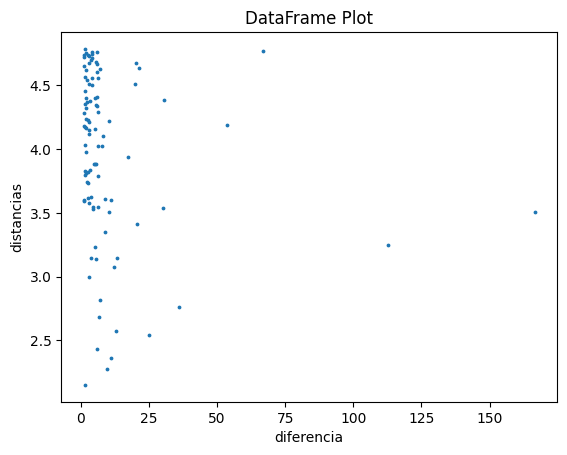

In [ ]:
plot = res.plot.scatter(title="DataFrame Plot", x='diferencia', y='distancias', s=3)